### **The dataset contains information about pizza sales, including details**

### **OBJECTIVES **
The main objective of this project is to identify trends, patterns in the data
which can lead to improved sales performance and customer satisfaction.
Gain insights into customer preferences, sales patterns, and key factors influencing pizza sales.
Understand customer preferences for pizza toppings.
Evaluate sales performance across different pizza sizes and crust types.
Identify popular pizza combinations and variations.
Assess the impact of promotional activities on sales volume.
Analyze customer segmentation and preferences for targeted marketing efforts.
Determine correlations between specific pizza attributes and customer satisfaction.
Uncover potential seasonal or time-of-day trends in pizza sales.
Identify repeat customer patterns and loyalty trends.


### **CHALLENGES**
Difficulty in identifying and targeting specific customer segments with tailored marketing strategies.
Limited understanding of the impact of promotional activities on sales volume and customer engagement.
Inconsistent sales performance across different locations and pizza variations.




### Imports the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("pizza_sales.csv")
data.head()


,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


# Total revenue

In [ ]:
total_revenue_df = data['total_price'].sum()

In [ ]:
total_revenue_df

817860.05

**`# Average Order Value`**






In [ ]:
avg_order_df = data['total_price'].sum() / data['order_id'].nunique()

In [ ]:
avg_order_df

38.30726229508197

# Total pizza sold

In [ ]:
total_pizza_sold_df = data['quantity'].sum()

In [ ]:
total_pizza_sold_df

49574

# Total orders

In [ ]:
total_orders_df = data['order_id'].nunique()

In [ ]:
total_orders_df

21350

# Average pizza per order


In [ ]:
average_pizza_per_order_df = data.groupby('order_id')['quantity'].sum().mean()

average_pizza_per_order_df

2.321967213114754

# Daily Trend for Total Order

# Convert 'order_date' column to datetime format


In [ ]:
# Convert 'order_date' column to datetime format
data['order_date'] = pd.to_datetime(data['order_date'], dayfirst=True)

# Daily Trend for Total Order
daily_trend_df = data.groupby(data['order_date'].dt.strftime('%A'))['order_id'].nunique().sort_values(ascending=False)

In [ ]:
daily_trend_df = data.groupby(data['order_date'].dt.strftime('%A'))['order_id'].nunique().sort_values(ascending=False)

daily_trend_df

order_date
Friday       3538
Thursday     3239
Saturday     3158
Wednesday    3024
Tuesday      2973
Monday       2794
Sunday       2624
Name: order_id, dtype: int64

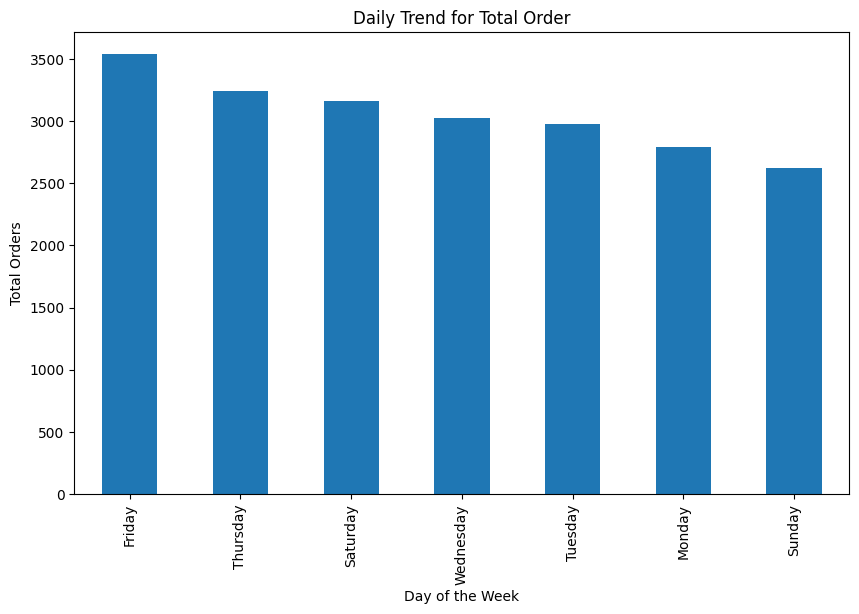

In [ ]:
# Daily Trend for Total Order
plt.figure(figsize=(10, 6))
daily_trend_df.plot(kind='bar')
plt.title('Daily Trend for Total Order')
plt.ylabel('Total Orders')
plt.xlabel('Day of the Week')
plt.show()

# Hourly Trend for Total Order


In [ ]:
# Extract hour from 'order_time'
data['order_hour'] = data['order_time'].str.split(':').str[0]

# Convert 'order_hour' to numeric
data['order_hour'] = pd.to_numeric(data['order_hour'])

# Hourly Trend for Total Order
hourly_trend_df = data.groupby('order_hour')['order_id'].nunique().sort_index()
hourly_trend_df

order_hour
9        1
10       8
11    1231
12    2520
13    2455
14    1472
15    1468
16    1920
17    2336
18    2399
19    2009
20    1642
21    1198
22     663
23      28
Name: order_id, dtype: int64

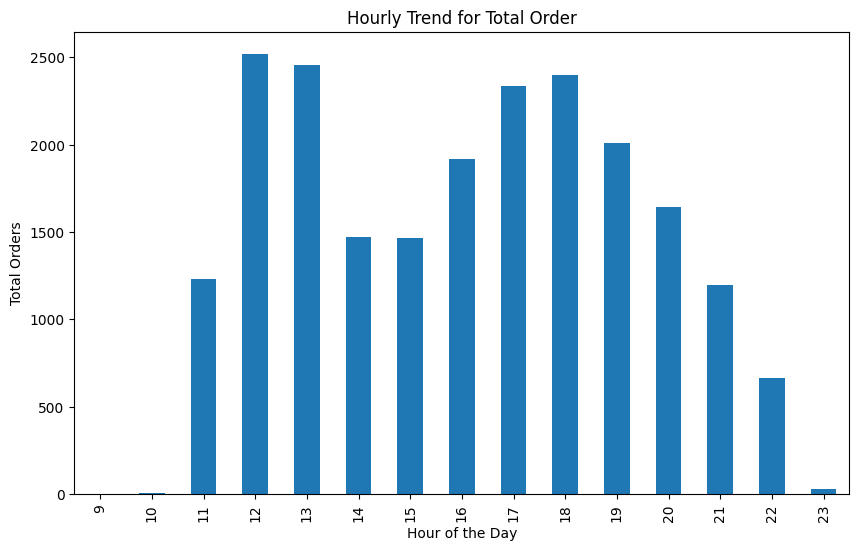

In [ ]:
# Hourly Trend for Total Order
plt.figure(figsize=(10, 6))
hourly_trend_df.plot(kind='bar')
plt.title('Hourly Trend for Total Order')
plt.ylabel('Total Orders')
plt.xlabel('Hour of the Day')
plt.show()

# Percentage of sales by Pizza Category


In [ ]:
percentage_sales_pizza_category_df = data[data['order_date'].dt.month == 1].groupby('pizza_category')['total_price'].sum() * 100 / data[data['order_date'].dt.month == 1]['total_price'].sum()
percentage_sales_pizza_category_df

pizza_category
Chicken    23.195278
Classic    26.677919
Supreme    25.689787
Veggie     24.437016
Name: total_price, dtype: float64

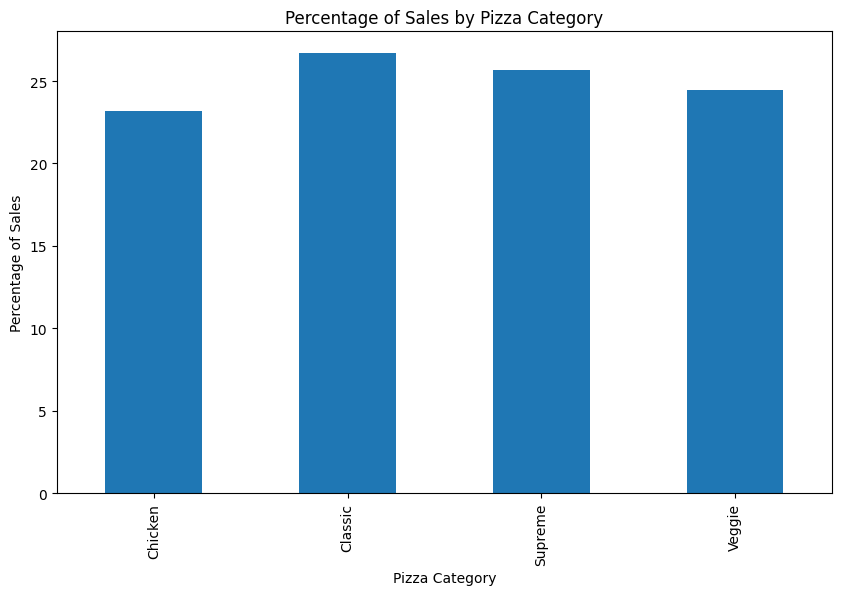

In [ ]:
# Percentage of sales by Pizza Category
plt.figure(figsize=(10, 6))
percentage_sales_pizza_category_df.plot(kind='bar')
plt.title('Percentage of Sales by Pizza Category')
plt.ylabel('Percentage of Sales')
plt.xlabel('Pizza Category')
plt.show()

# Percentage of sales by Pizza Size


In [ ]:
percentage_sales_pizza_size_df = data[data['order_date'].dt.quarter == 1].groupby('pizza_size')['total_price'].sum() * 100 / data[data['order_date'].dt.quarter == 1]['total_price'].sum()
percentage_sales_pizza_size_df



pizza_size
L      46.374312
M      29.782810
S      22.100925
XL      1.601899
XXL     0.140054
Name: total_price, dtype: float64

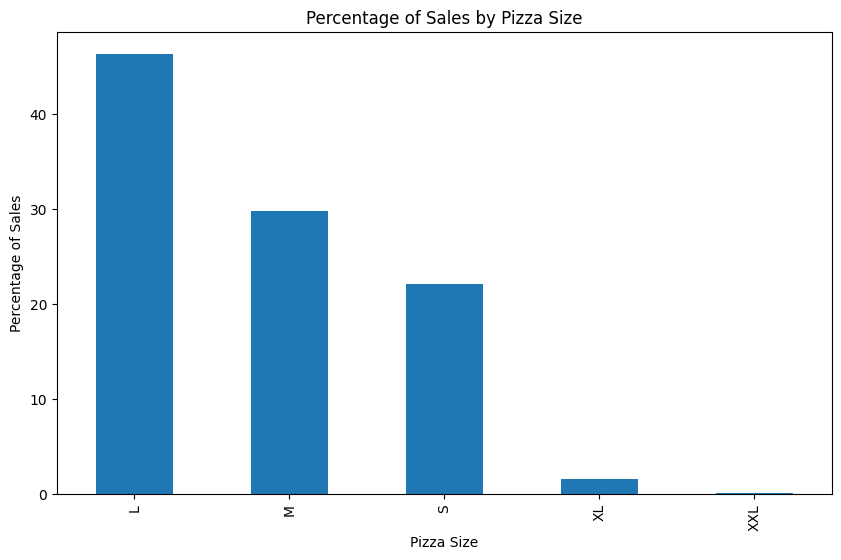

In [ ]:
# Percentage of sales by Pizza Size
plt.figure(figsize=(10, 6))
percentage_sales_pizza_size_df.plot(kind='bar')
plt.title('Percentage of Sales by Pizza Size')
plt.ylabel('Percentage of Sales')
plt.xlabel('Pizza Size')
plt.show()

# Total pizza sold by pizza Category


In [ ]:
total_pizza_sold_by_category_df = data.groupby('pizza_category')['quantity'].sum().sort_values(ascending=False)
total_pizza_sold_by_category_df



pizza_category
Classic    14888
Supreme    11987
Veggie     11649
Chicken    11050
Name: quantity, dtype: int64

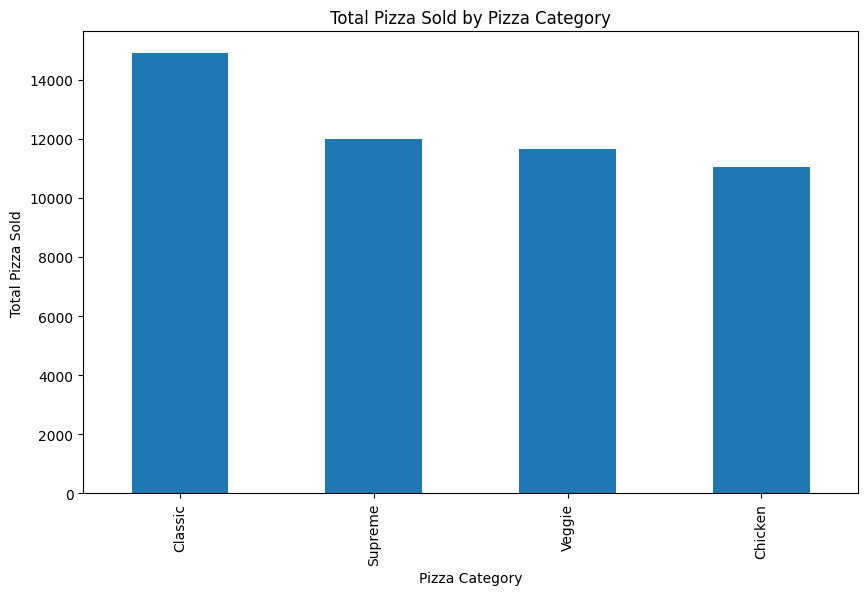

In [ ]:
# Total pizza sold by pizza Category
plt.figure(figsize=(10, 6))
total_pizza_sold_by_category_df.plot(kind='bar')
plt.title('Total Pizza Sold by Pizza Category')
plt.ylabel('Total Pizza Sold')
plt.xlabel('Pizza Category')
plt.show()

# Top 5 best Sellers by total pizza sold


In [ ]:
top_5_best_sellers_df = data.groupby('pizza_name')['quantity'].sum().nlargest(5)
top_5_best_sellers_df


pizza_name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64

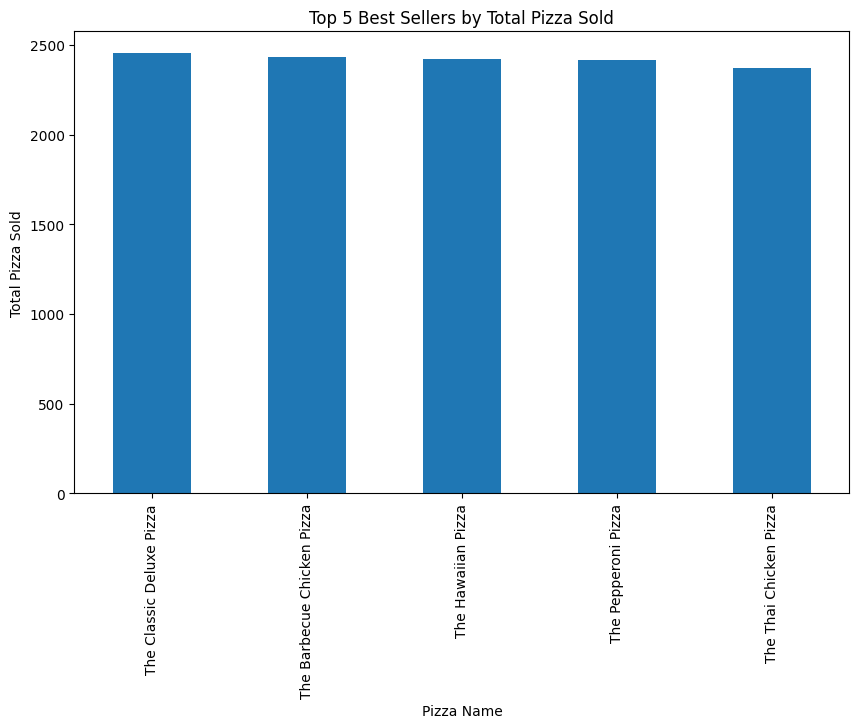

In [ ]:
# Top 5 best Sellers by total pizza sold
plt.figure(figsize=(10, 6))
top_5_best_sellers_df.plot(kind='bar')
plt.title('Top 5 Best Sellers by Total Pizza Sold')
plt.ylabel('Total Pizza Sold')
plt.xlabel('Pizza Name')
plt.show()


# 5 worst Sellers by total pizza sold


In [ ]:
worst_5_sellers_df = data.groupby('pizza_name')['quantity'].sum().nsmallest(5)

In [ ]:
worst_5_sellers_df

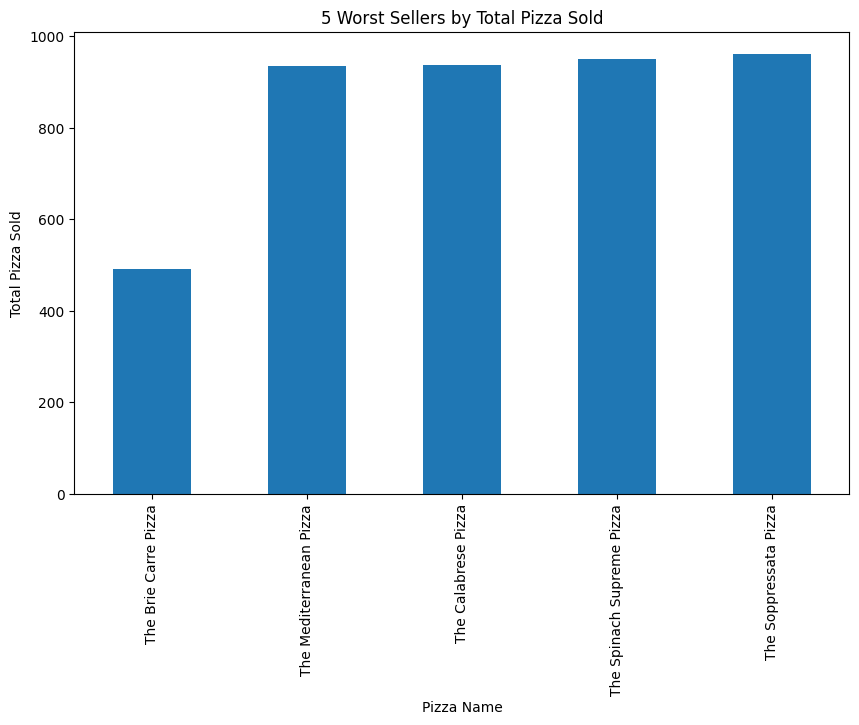

In [ ]:
# 5 worst Sellers by total pizza sold
plt.figure(figsize=(10, 6))
worst_5_sellers_df.plot(kind='bar')
plt.title('5 Worst Sellers by Total Pizza Sold')
plt.ylabel('Total Pizza Sold')
plt.xlabel('Pizza Name')
plt.show()

### **Insights**

# **Based on the analysis conducted, I have gained several valuable insights into the pizza sales data. Here are the key insights we obtained:**

Lunchtime Rush:

The most bustling period for the pizza shop is between 12 PM and 2 PM, indicating a significant influx of customers during lunch hours.

Sunday as the Least Busy Weekday: Sundays exhibit lower customer activity compared to other weekdays, suggesting that the shop's main customer base consists primarily of working individuals.

Preference for Large Size: The most preferred pizza size by customers is large.

Classic Category Dominance: The Classic category emerges as the most ordered, highest revenue-generating, and most available pizza category.

Average Pizza Per Order: With an average of 2.32 pizzas per order, it is evident that customers usually come in groups when ordering. This suggests that the pizza shop attracts customers looking to share a meal or cater to gatherings or social events.